In [50]:
# statistical: min, max, arithmetic mean, median, sum, std deviation, variance, 
# rms value, skewness, kurtosis, shannon entropy, log energy entropy
# 12 features

In [56]:
import statistics as st #statistical calc
import numpy as np
import pandas as pd
import scipy.stats as scst
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

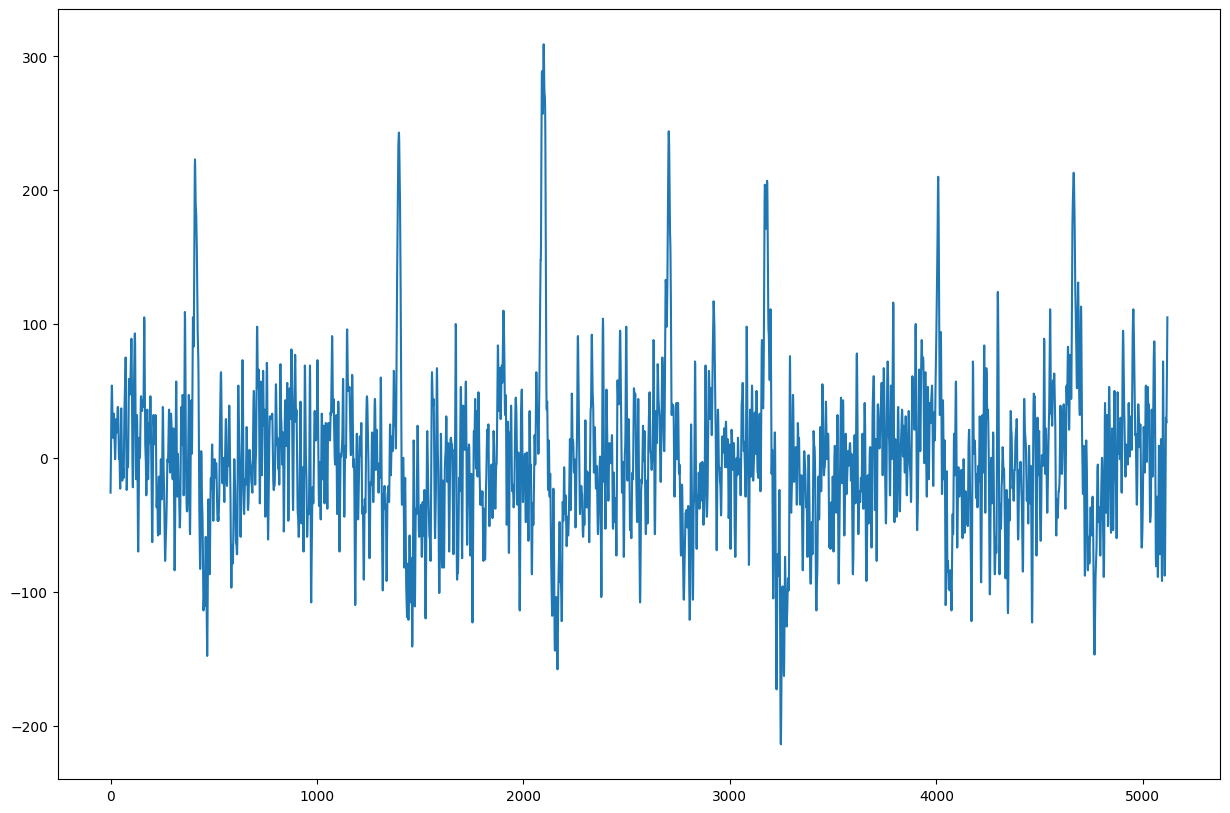

In [52]:
def shannon(x):
    y = np.power(x,2)
    y1 = np.sum(y)
    PE = y/y1
    SE = -np.sum(PE*np.log(np.power(PE,2)))
    return SE

def Logenergy(x):
    y = np.power(x,2)
    y1 = np.sum(y)
    PE = y/y1
    LEE = np.sum(PE*np.log(PE))
    return LEE

data = pd.read_csv('Dataset\Output1\C_1\s1.csv')
x = data.iloc[:,1].values
data.iloc[:,1].plot(figsize=(15,10))

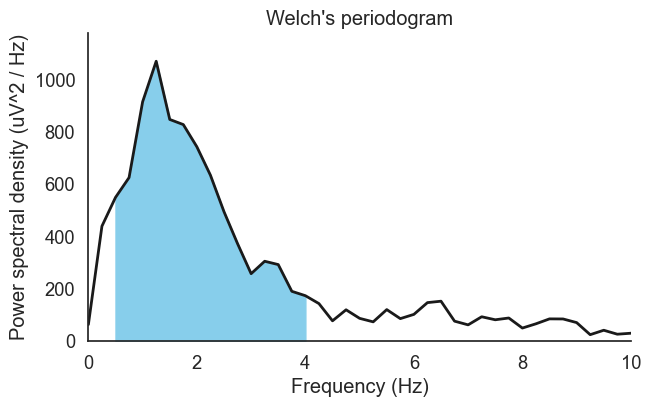

In [58]:
from scipy import signal
sf = 256.
win = 4 * sf
freqs, psd = signal.welch(x, sf, nperseg=win)

# Plot the power spectrum
low, high = 0.5, 4

# Find intersecting values in frequency vector
idx_delta = np.logical_and(freqs >= low, freqs <= high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freqs, psd, lw=2, color='k')
plt.fill_between(freqs, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (uV^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
sns.despine()


In [61]:
from scipy.integrate import simps

freq_res = freqs[1] - freqs[0]  # = 1 / 4 = 0.25

# Compute the absolute power by approximating the area under the curve
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uV^2' % delta_power)

# Relative delta power (expressed as a percentage of total power)
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Absolute delta power: 1996.865 uV^2
Relative delta power: 0.561


In [54]:
MIN = np.min(x)
print('Min value is:',MIN)
MAX = np.max(x)
print('Max value is:',MAX)
MEAN = np.mean(x)
print('Mean value is:',MEAN)
MED = np.median(x)
print('Median value is:',MED)
SUM = np.sum(x)
print('Sum value is:',SUM)
STD = np.std(x)
print('Std deviation value is:',STD)
VAR = st.variance(x)
print('Variance value is:',VAR)
SKEW = scst.skew(x)
print('Skewness value is:',SKEW)
KURT = scst.kurtosis(x)
print('Kurtosis value is:',KURT)
# SE = shannon(x)
# print(SE)
# LEE = Logenergy(x)
# print(LEE)


Min value is: -214
Max value is: 309
Mean value is: -1.3560546875
Median value is: -4.0
Sum value is: -6943
Std deviation value is: 56.797924959869874
Variance value is: 3226
Skewness value is: 0.9265041865486833
Kurtosis value is: 3.571612715218482
